In [1]:
from matplotlib import pyplot as plt
from matplotlib import ticker, animation

%matplotlib notebook

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


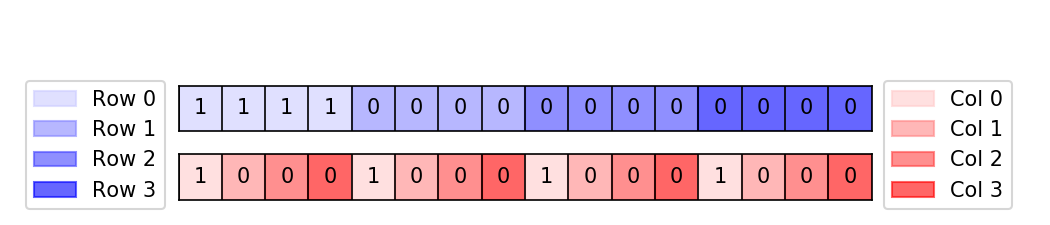

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(7, 1.5), gridspec_kw={'hspace': 0.5})

n_cells = 16

cell_text = {}

for ax in axes:
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax.axis((0.5, n_cells - 0.5, 0, 1))
    ax.grid(color='black')
    ax.set_xticks([i - 0.5 for i in range(n_cells)])
    ax.set_yticks([])
    cell_text[ax] = [ax.text(i, 0.5, 0, verticalalignment='center', horizontalalignment='center') for i in range(n_cells)]

ax1, ax2 = axes    

for i, colour in zip(range(0, 16, 4), ['#CCCCFF', '#8888FF', '#4444FF', '#0000FF']):
    ax1.axvspan(i - 0.5, i + 3.5, color=colour, alpha=0.6, label='Row {}'.format(i // 4))
    
for i, colour in zip(range(0, 16), ['#FFCCCC', '#FF8888', '#FF4444', '#FF0000'] * 4):
    ax2.axvspan(i - 0.5, i + 0.5, color=colour, alpha=0.6)

ax1.legend(loc='center', bbox_to_anchor=(-0.12, -0.3))
ax2.legend(['Col {}'.format(i) for i in range(4)], loc='center', bbox_to_anchor=(1.11, 1.2))

fig.subplots_adjust(left=0.17, right=0.83, top=0.62)
    
def init_func():
    global reading_text, row_artist, col_artist
    reading_text = fig.text(0.5, 0.8, '', verticalalignment='center', horizontalalignment='center')
    row_artist = ax1.axvspan(0, 0)
    col_artist = ax2.axvspan(0, 0)
    
def anim_func(i):
    global reading_text, row_artist, col_artist, cell_text
    if i == 0:
        row_artist.remove()
        j = i * 4
        reading_text._text = 'Writing to row 0, col 0-3'
        row_artist = ax1.axvspan(j - 0.5, j + 3.5, color='black', alpha=0.4)
        for text in cell_text[ax1][j:(i + 1) * 4]:
            text._text = '1'
            
    elif i == 1:
        row_artist.remove()
        reading_text._text = ''
    
    elif 1 < i <= 5:
        col_artist.remove()
        j = i - 2
        offset = j * 4
        reading_text._text = 'Writing to row {}, col 0'.format(j)
        col_artist = ax2.axvspan(offset - 0.5, offset + 0.5, color='black', alpha=0.5)
        cell_text[ax2][offset]._text = '1'
        
    elif i == 6:
        col_artist.remove()
        reading_text._text = ''
        
    else:
        pass
    
anim = animation.FuncAnimation(fig, anim_func, init_func=init_func, frames=10, interval=1500, repeat=False)
# anim.save('memory_layout.mp4')
    
# fig.savefig('test.png', dpi=120)

<IPython.core.display.Javascript object>


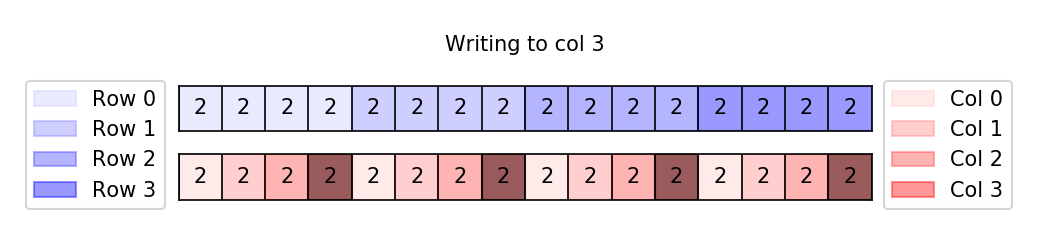

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(7, 1.5), gridspec_kw={'hspace': 0.5})

n_cells = 16

cell_text = {}

for ax in axes:
    ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
    ax.axis((0.5, n_cells - 0.5, 0, 1))
    ax.grid(color='black')
    ax.set_xticks([i - 0.5 for i in range(n_cells)])
    ax.set_yticks([])
    cell_text[ax] = [ax.text(i, 0.5, 1, verticalalignment='center', horizontalalignment='center') for i in range(n_cells)]

ax1, ax2 = axes    

for i, colour in zip(range(0, 16, 4), ['#CCCCFF', '#8888FF', '#4444FF', '#0000FF']):
    ax1.axvspan(i - 0.5, i + 3.5, color=colour, alpha=0.4, label='Row {}'.format(i // 4))
    
for i, colour in zip(range(0, 16), ['#FFCCCC', '#FF8888', '#FF4444', '#FF0000'] * 4):
    ax2.axvspan(i - 0.5, i + 0.5, color=colour, alpha=0.4)

ax1.legend(loc='center', bbox_to_anchor=(-0.12, -0.3))
ax2.legend(['Col {}'.format(i) for i in range(4)], loc='center', bbox_to_anchor=(1.11, 1.2))

fig.subplots_adjust(left=0.17, right=0.83, top=0.62)
    
def init_func():
    pass
    
reading_text = fig.text(0.0, 0.0, '')
row_artist = ax1.axvspan(0, 0)
col_artists = [ax2.axvspan(0, 0) for i in range(4)]
    
def anim_func(i):
    global reading_text, row_artist, col_artists, cell_text
    if i <= 3:
        j = i * 4
        reading_text.remove()
        reading_text = fig.text(0.5, 0.8, 'Writing to row {}'.format(i), verticalalignment='center', horizontalalignment='center')
        row_artist.remove()
        row_artist = ax1.axvspan(j - 0.5, j+ 3.5, color='black', alpha=0.4)
        for text in cell_text[ax1][j:(i + 1) * 4]:
            text._text = '2'
        
    elif 3 < i <= 5:
        pass
    
    elif 5 < i <= 9:
        if row_artist in ax1.patches:
            row_artist.remove()
            
        j = i - 6
        reading_text.remove()
        reading_text = fig.text(0.5, 0.8, 'Writing to col {}'.format(j), verticalalignment='center', horizontalalignment='center')
        for artist in col_artists:
            artist.remove()

        col_artists = [ax2.axvspan(j + offset - 0.5, j + offset + 0.5, color='black', alpha=0.4) for offset in range(0, 16, 4)]
        for text in cell_text[ax2][j:n_cells:4]:
            text._text = '2'
        
    else:
        pass
    
animation.FuncAnimation(fig, anim_func, init_func=init_func, frames=10, interval=1000, repeat=False)
    
# fig.savefig('test.png', dpi=120)